#   Python Machine Learning Labs

In [65]:
# Librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# I- Data Exploration
   1. Read Data into a dataframe
   2. Check invalid values
   3. Describe the data
   4. Explore data using Histograms

### 1. Read Data into a dataframe

In [66]:
# Load the dataset
df = pd.read_csv("/Users/p105660/Documents/ML_Project_Final/books.csv", error_bad_lines = False)

C:\Users\p105660\AppData\Local\Temp\ipykernel_11608\3144709383.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("/Users/p105660/Documents/ML_Project_Final/books.csv", error_bad_lines = False)
Skipping line 3350: expected 12 fields, saw 13
Skipping line 4704: expected 12 fields, saw 13
Skipping line 5879: expected 12 fields, saw 13
Skipping line 8981: expected 12 fields, saw 13



In [67]:
# Display the first 5 rows of the dataframe
df.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [68]:
# Number of lines and columns before cleaning
df.shape

(11123, 12)

### 2. Check invalid values

In [69]:
# Drop lines with wrong number of columns
df = df.drop([587, 3350,4704,8981])

In [70]:
# Number of lignes and columns after cleaning
df.shape

(11119, 12)

In [71]:
# check number of null lines for each column
df.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [72]:
# Drop the space for num_pages and all columns if it exist
df.columns = df.columns.str.replace(' ', '')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11119 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11119 non-null  int64  
 1   title               11119 non-null  object 
 2   authors             11119 non-null  object 
 3   average_rating      11119 non-null  float64
 4   isbn                11119 non-null  object 
 5   isbn13              11119 non-null  int64  
 6   language_code       11119 non-null  object 
 7   num_pages           11119 non-null  int64  
 8   ratings_count       11119 non-null  int64  
 9   text_reviews_count  11119 non-null  int64  
 10  publication_date    11119 non-null  object 
 11  publisher           11119 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.1+ MB


### 3. Describe the data

In [73]:
#Get column type information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11119 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11119 non-null  int64  
 1   title               11119 non-null  object 
 2   authors             11119 non-null  object 
 3   average_rating      11119 non-null  float64
 4   isbn                11119 non-null  object 
 5   isbn13              11119 non-null  int64  
 6   language_code       11119 non-null  object 
 7   num_pages           11119 non-null  int64  
 8   ratings_count       11119 non-null  int64  
 9   text_reviews_count  11119 non-null  int64  
 10  publication_date    11119 non-null  object 
 11  publisher           11119 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.1+ MB


In [74]:
# Generate descriptive statistics for all numeric columns in the DataFrame
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11119.00000,11119.000000,1.111900e+04,11119.000000,1.111900e+04,11119.000000
mean,21312.59097,3.934102,9.759873e+12,336.394820,1.794094e+04,541.962497
std,13094.80650,0.350539,4.430554e+11,241.172409,1.125171e+05,2576.984016
min,1.00000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.50000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20315.00000,3.960000,9.780586e+12,299.000000,7.450000e+02,46.000000
75%,32104.50000,4.140000,9.780873e+12,416.000000,5.000500e+03,238.000000
max,45641.00000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


### 4.Explore data using Histograms

#### a)- Continuous variables

mean =  21312.59097041101
std deviation =  13094.80649963844


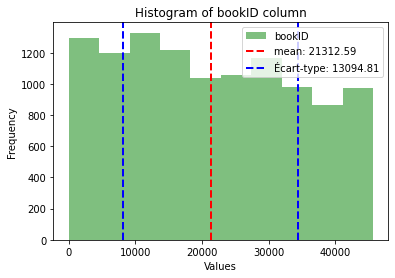

In [84]:
# mean and std deviation
Mean = df['bookID'].mean()
std_dev = df['bookID'].std()
print('mean = ', Mean)
print('std deviation = ', std_dev)

# Drawing column using histogram
plt.hist(df['bookID'], bins=10, alpha=0.5, label='bookID', color='g')

# Ajouter la moyenne et l'écart-type
plt.axvline(Mean, color='r', linestyle='dashed', linewidth=2, label=f'mean: {Mean:.2f}')
plt.axvline(Mean - std_dev, color='b', linestyle='dashed', linewidth=2, label=f'Écart-type: {std_dev:.2f}')
plt.axvline(Mean + std_dev, color='b', linestyle='dashed', linewidth=2)

plt.title('Histogram of bookID column')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()


mean =  3.9341019875888117
std deviation =  0.3505392767219406


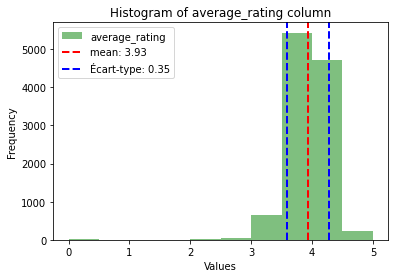

In [85]:
# mean and std deviation
Mean = df['average_rating'].mean()
std_dev = df['average_rating'].std()
print('mean = ', Mean)
print('std deviation = ', std_dev)

# Drawing column using histogram
plt.hist(df['average_rating'], bins=10, alpha=0.5, label='average_rating', color='g')

# Ajouter la moyenne et l'écart-type
plt.axvline(Mean, color='r', linestyle='dashed', linewidth=2, label=f'mean: {Mean:.2f}')
plt.axvline(Mean - std_dev, color='b', linestyle='dashed', linewidth=2, label=f'Écart-type: {std_dev:.2f}')
plt.axvline(Mean + std_dev, color='b', linestyle='dashed', linewidth=2)

plt.title('Histogram of average_rating column')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

mean =  9759872847215.834
std deviation =  443055353232.85736


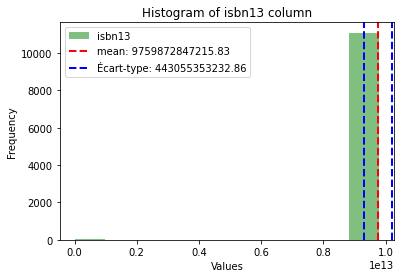

In [86]:
# mean and std deviation
Mean = df['isbn13'].mean()
std_dev = df['isbn13'].std()
print('mean = ', Mean)
print('std deviation = ', std_dev)

# Drawing column using histogram
plt.hist(df['isbn13'], bins=10, alpha=0.5, label='isbn13', color='g')

# Ajouter la moyenne et l'écart-type
plt.axvline(Mean, color='r', linestyle='dashed', linewidth=2, label=f'mean: {Mean:.2f}')
plt.axvline(Mean - std_dev, color='b', linestyle='dashed', linewidth=2, label=f'Écart-type: {std_dev:.2f}')
plt.axvline(Mean + std_dev, color='b', linestyle='dashed', linewidth=2)

plt.title('Histogram of isbn13 column')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

mean =  336.3948196780286
std deviation =  241.17240859130752


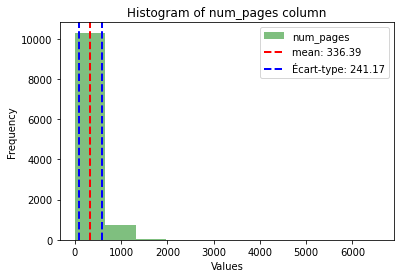

In [87]:
# mean and std deviation
Mean = df['num_pages'].mean()
std_dev = df['num_pages'].std()
print('mean = ', Mean)
print('std deviation = ', std_dev)

# Drawing column using histogram
plt.hist(df['num_pages'], bins=10, alpha=0.5, label='num_pages', color='g')

# Ajouter la moyenne et l'écart-type
plt.axvline(Mean, color='r', linestyle='dashed', linewidth=2, label=f'mean: {Mean:.2f}')
plt.axvline(Mean - std_dev, color='b', linestyle='dashed', linewidth=2, label=f'Écart-type: {std_dev:.2f}')
plt.axvline(Mean + std_dev, color='b', linestyle='dashed', linewidth=2)

plt.title('Histogram of num_pages column')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

mean =  17940.93965284648
std deviation =  112517.13903037412


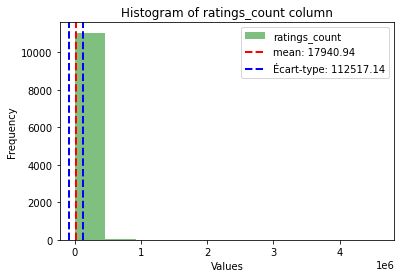

In [88]:
# mean and std deviation
Mean = df['ratings_count'].mean()
std_dev = df['ratings_count'].std()
print('mean = ', Mean)
print('std deviation = ', std_dev)

# Drawing column using histogram
plt.hist(df['ratings_count'], bins=10, alpha=0.5, label='ratings_count', color='g')

# Ajouter la moyenne et l'écart-type
plt.axvline(Mean, color='r', linestyle='dashed', linewidth=2, label=f'mean: {Mean:.2f}')
plt.axvline(Mean - std_dev, color='b', linestyle='dashed', linewidth=2, label=f'Écart-type: {std_dev:.2f}')
plt.axvline(Mean + std_dev, color='b', linestyle='dashed', linewidth=2)

plt.title('Histogram of ratings_count column')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

mean =  541.9624966273946
std deviation =  2576.9840162519454


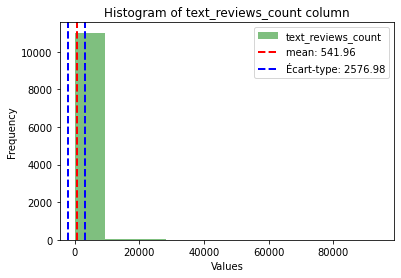

In [89]:
# mean and std deviation
Mean = df['text_reviews_count'].mean()
std_dev = df['text_reviews_count'].std()
print('mean = ', Mean)
print('std deviation = ', std_dev)

# Drawing column using histogram
plt.hist(df['text_reviews_count'], bins=10, alpha=0.5, label='text_reviews_count', color='g')

# Ajouter la moyenne et l'écart-type
plt.axvline(Mean, color='r', linestyle='dashed', linewidth=2, label=f'mean: {Mean:.2f}')
plt.axvline(Mean - std_dev, color='b', linestyle='dashed', linewidth=2, label=f'Écart-type: {std_dev:.2f}')
plt.axvline(Mean + std_dev, color='b', linestyle='dashed', linewidth=2)

plt.title('Histogram of text_reviews_count column')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### b)- Categorical variables

In [90]:
vars_categ = ['title', 'authors', 'isbn', 'language_code','publisher']
df[vars_categ].describe()

,title,authors,isbn,language_code,publisher
count,11119,11119,11119,11119,11119
unique,10345,6637,11119,27,2289
top,The Brothers Karamazov,P.G. Wodehouse,0439785960,eng,Vintage
freq,9,40,1,8905,318


# Remarks: 
- We have 11119 books.
- Most of books are in english (8905/11119).
- P.G. Wodehouse is the author with the most number of books (40 books).
- The Brothers Karamazovis the most reccurent book (9 times).
- Most publisher is Vintage (318 books).

# II. Data Analysis and ML
1. Type of problem
2. Data analysis
3. Split the data
4. Feature engineering
5. Selected model

### 1. Type of problem 
- We are going to try to predict the average rating of each book, we are in the context of a supervised problem.
- Predicting a value: it’s a regression.

### 2. Data analysis

In [18]:
# The column to predict is average_rating
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [19]:
# check number of null lines for each column
df.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

C:\Program Files (x86)\python39\V_3.9.8\soft\WPy64\python-3.9.8.amd64\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


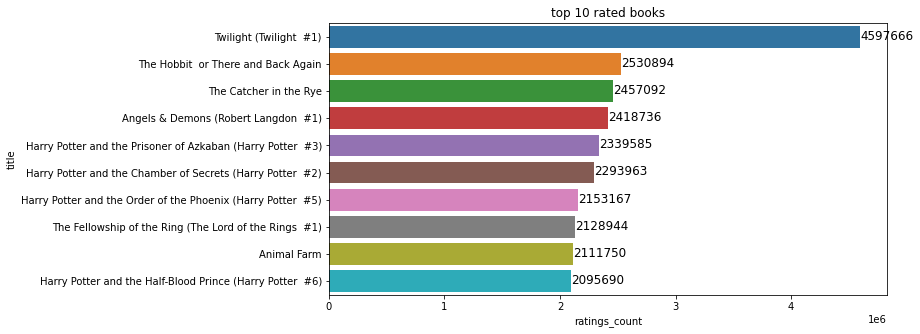

In [20]:
# The top 10 rated books
top_10 = df.nlargest(10, ['ratings_count']).set_index('title')['ratings_count']
plot_dims = (10, 5)
fig, ax = plt.subplots(figsize=plot_dims)
sns.barplot(top_10, top_10.index)
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 12)
plt.title('top 10 rated books')
plt.xlabel('ratings_count')
plt.show()

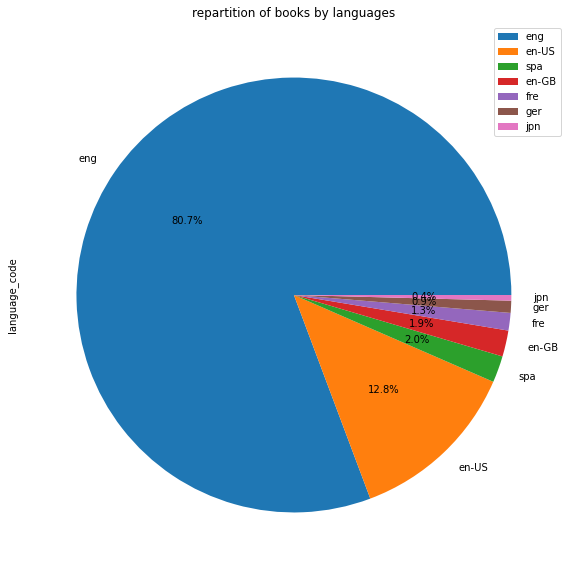

In [91]:
# Repartition books by languages
df['language_code'].value_counts().head(7).plot(kind = 'pie', figsize=(10, 10), autopct='%1.1f%%').legend()
plt.title('repartition of books by languages')
plt.show()

In [22]:
df['language_code'] = df['language_code'].replace('en-US', 'eng')

In [23]:
df['language_code'] = df['language_code'].replace('en-GB', 'eng')

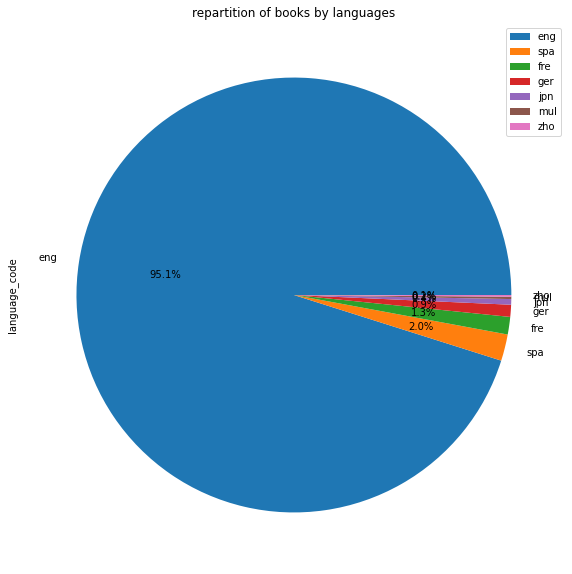

In [24]:
# # Repartition books by languages after data processing
df['language_code'].value_counts().head(7).plot(kind = 'pie', figsize=(10, 10), autopct='%1.1f%%').legend()
plt.title('repartition of books by languages')
plt.show()

In [25]:
# craat Dataset with top 4 languages
df_top_4_languages = df.loc[df['language_code'].isin(['eng','spa', 'fre', 'ger'])] 
df_top_4_languages.shape
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [26]:
df_top_4_languages.shape

(10987, 12)

In [27]:
df_top_4_languages.language_code.value_counts()

eng    10526
spa      218
fre      144
ger       99
Name: language_code, dtype: int64

### 3. Split the data
- The objective is to split the data of the new dataset df_top_4_languages into two categories based on the ratings_count
      a)- df_HighRate: It contains books that have received The total number of ratings the book received >= 100000
      b)- df_LowRate: It contains books that have received The total number of ratings the book received < 100000

In [28]:
# Definition du dataset avec The total number of ratings the book received >= 100000
df_HighRate = df_top_4_languages.drop(df_top_4_languages.index[df_top_4_languages['ratings_count'] < 100000])
df_HighRate.shape

(352, 12)

In [29]:
df_HighRate

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books
12,21,A Short History of Nearly Everything,Bill Bryson,4.21,076790818X,9780767908184,eng,544,248558,9396,9/14/2004,Broadway Books
...,...,...,...,...,...,...,...,...,...,...,...,...
10728,43763,Interview with the Vampire (The Vampire Chroni...,Anne Rice,3.99,0345476875,9780345476876,eng,342,433413,7368,8/31/2004,Ballantine Books
10738,43814,The Vampire Lestat (The Vampire Chronicles #2),Anne Rice,4.07,0345476883,9780345476883,eng,481,156354,2720,8/31/2004,Ballantine Books
10750,43889,Wizard's First Rule (Sword of Truth #1),Terry Goodkind,4.13,0765346524,9780765346520,eng,836,204648,4986,4/14/2003,Tor Books
10825,44186,The Monster at the End of this Book,Jon Stone/Michael J. Smollin,4.44,037582913X,9780375829130,eng,32,114297,2565,5/11/2004,Golden Books


In [30]:
# Definition du dataset avec The total number of ratings the book received >= 100000
df_LowRate = df_top_4_languages.drop(df_top_4_languages.index[df_top_4_languages['ratings_count'] >= 100000])
df_LowRate.shape

(10635, 12)

In [31]:
df_LowRate

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,eng,152,19,1,4/26/2005,Nimble Books
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic
7,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


### 4. Feature engineering
- In this step, we will encode the categorical variables for our two datasets (df_HighRat, df_LowRat). The objective of this step is to assign numerical values to all textual variables 

### a)- Encoding column 'authors'

In [32]:
# Encoding the auther variables for df_HighRate dataset
df_HighRate['authors'] = preprocessing.LabelEncoder().fit_transform(df_HighRate['authors'])
df_HighRate

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,90,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,90,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,90,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,55,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books
12,21,A Short History of Nearly Everything,26,4.21,076790818X,9780767908184,eng,544,248558,9396,9/14/2004,Broadway Books
...,...,...,...,...,...,...,...,...,...,...,...,...
10728,43763,Interview with the Vampire (The Vampire Chroni...,11,3.99,0345476875,9780345476876,eng,342,433413,7368,8/31/2004,Ballantine Books
10738,43814,The Vampire Lestat (The Vampire Chronicles #2),11,4.07,0345476883,9780345476883,eng,481,156354,2720,8/31/2004,Ballantine Books
10750,43889,Wizard's First Rule (Sword of Truth #1),229,4.13,0765346524,9780765346520,eng,836,204648,4986,4/14/2003,Tor Books
10825,44186,The Monster at the End of this Book,125,4.44,037582913X,9780375829130,eng,32,114297,2565,5/11/2004,Golden Books


In [33]:
# Encoding the auther variables for df_LowRate dataset
df_LowRate['authors'] = preprocessing.LabelEncoder().fit_transform(df_LowRate['authors'])
df_LowRate

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
2,4,Harry Potter and the Chamber of Secrets (Harry...,2566,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,2568,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",6159,3.74,0976540606,9780976540601,eng,152,19,1,4/26/2005,Nimble Books
6,10,Harry Potter Collection (Harry Potter #1-6),2566,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic
7,12,The Ultimate Hitchhiker's Guide: Five Complete...,1437,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,6400,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,6399,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),6399,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,6399,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


### b)- Encoding column 'title'

In [34]:
# Encoding the title variables for df_HighRate dataset
df_HighRate['title'] = preprocessing.LabelEncoder().fit_transform(df_HighRate['title'])
df_HighRate

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,98,90,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,99,90,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
3,5,100,90,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,13,313,55,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books
12,21,19,26,4.21,076790818X,9780767908184,eng,544,248558,9396,9/14/2004,Broadway Books
...,...,...,...,...,...,...,...,...,...,...,...,...
10728,43763,112,11,3.99,0345476875,9780345476876,eng,342,433413,7368,8/31/2004,Ballantine Books
10738,43814,316,11,4.07,0345476883,9780345476883,eng,481,156354,2720,8/31/2004,Ballantine Books
10750,43889,345,229,4.13,0765346524,9780765346520,eng,836,204648,4986,4/14/2003,Tor Books
10825,44186,272,125,4.44,037582913X,9780375829130,eng,32,114297,2565,5/11/2004,Golden Books


In [35]:
# Encoding the title variables for df_LowRate dataset
df_LowRate['title'] = preprocessing.LabelEncoder().fit_transform(df_LowRate['title'])
df_LowRate

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
2,4,2980,2566,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
4,8,2975,2568,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
5,9,9403,6159,3.74,0976540606,9780976540601,eng,152,19,1,4/26/2005,Nimble Books
6,10,2976,2566,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic
7,12,8846,1437,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,2363,6400,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,9913,6399,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,7609,6399,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,5258,6399,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


### c)- Encoding column 'publisher'

In [36]:
# Encoding the publisher variables for df_HighRate dataset
df_HighRate['publisher'] = preprocessing.LabelEncoder().fit_transform(df_HighRate['publisher'])
df_HighRate

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,98,90,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,132
1,2,99,90,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,132
3,5,100,90,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,132
8,13,313,55,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,36
12,21,19,26,4.21,076790818X,9780767908184,eng,544,248558,9396,9/14/2004,28
...,...,...,...,...,...,...,...,...,...,...,...,...
10728,43763,112,11,3.99,0345476875,9780345476876,eng,342,433413,7368,8/31/2004,19
10738,43814,316,11,4.07,0345476883,9780345476883,eng,481,156354,2720,8/31/2004,19
10750,43889,345,229,4.13,0765346524,9780765346520,eng,836,204648,4986,4/14/2003,157
10825,44186,272,125,4.44,037582913X,9780375829130,eng,32,114297,2565,5/11/2004,55


In [37]:
# Encoding the publisher variables for df_LowRate dataset
df_LowRate['publisher'] = preprocessing.LabelEncoder().fit_transform(df_LowRate['publisher'])
df_LowRate

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
2,4,2980,2566,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,1721
4,8,2975,2568,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,1721
5,9,9403,6159,3.74,0976540606,9780976540601,eng,152,19,1,4/26/2005,1328
6,10,2976,2566,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,1721
7,12,8846,1437,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,767
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,2363,6400,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,484
11119,45633,9913,6399,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,1442
11120,45634,7609,6399,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,1442
11121,45639,5258,6399,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,595


### c)- Split column 'language_code' with get_dummies()

In [38]:
# Encoding the language_code variables for df_HighRate dataset
encod_HR = pd.get_dummies(df_HighRate['language_code'])
cols = df_HighRate.columns.isin(['en-US', 'eng', 'fre', 'spa']).any()
if  cols == False:
    df_HighRate = pd.concat([df_HighRate, encod_HR], axis = 1)
print(df_HighRate.shape)
df_HighRate.head()

(352, 15)


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,eng,fre,spa
0,1,98,90,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,132,1,0,0
1,2,99,90,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,132,1,0,0
3,5,100,90,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,132,1,0,0
8,13,313,55,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,36,1,0,0
12,21,19,26,4.21,076790818X,9780767908184,eng,544,248558,9396,9/14/2004,28,1,0,0


In [39]:
# Encoding the language_code variables for df_LowRate dataset
encodLR = pd.get_dummies(df_LowRate['language_code'])
cols = df_LowRate.columns.isin(['en-US', 'eng', 'fre', 'spa']).any()
if  cols == False:
    df_LowRate = pd.concat([df_LowRate, encodLR ], axis = 1)
print(df_LowRate.shape)
df_LowRate.head()

(10635, 16)


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,eng,fre,ger,spa
2,4,2980,2566,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,1721,1,0,0,0
4,8,2975,2568,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,1721,1,0,0,0
5,9,9403,6159,3.74,0976540606,9780976540601,eng,152,19,1,4/26/2005,1328,1,0,0,0
6,10,2976,2566,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,1721,1,0,0,0
7,12,8846,1437,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,767,1,0,0,0


### 5. Selected model
- For this case I'm ready to build the Linear Regression Model, because Linear regression models are easier to adjust than models that are nonlinearly related to their parameters, and the statistical properties of the resulting estimators are easier to determine.

In [93]:
# split 80% of the data to the training set and 20% of the data to test set
df_train, df_test = train_test_split(df_LowRate,test_size = 0.2)

In [94]:
len(df_LowRate)

10635

In [95]:
len(df_train)

8508

In [96]:
len(df_test)

2127

In [97]:
# calculate the mean of the ratings_count column for the global dataset, train set, and test set
print(df_LowRate.ratings_count.mean())
print(df_train.ratings_count.mean())
print(df_test.ratings_count.mean())

5977.56097790315
6095.2624588622475
5506.755054066761


In [98]:
# calculate the mean of the average_rating column for the global dataset, train set, and test set
print(df_LowRate.average_rating.mean())
print(df_train.average_rating.mean())
print(df_test.average_rating.mean())

3.928847202632816
3.9291607898448513
3.927592853784673


In [46]:
df_LowRate.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'eng', 'fre', 'ger', 'spa'],
      dtype='object')

In [112]:
## Prediction on the data set df_LowRate
X = df_LowRate.drop(['average_rating', 'language_code', 'isbn','isbn13','publication_date'], axis = 1)
y = df_LowRate['average_rating']

# split 80% of the data to the training set and 20% of the data to test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Create a linear regression model
regrlinear = LinearRegression()  

# Train the model using the training data
regrlinear.fit(x_train, y_train)

# Predict the values of the test set
y_pred = regrlinear.predict(x_test)

# Display the regression coefficients
print('regression coefficients:', regrlinear.coef_)

# compare the actual and predicted values
df = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
df['diff'] = df['actual'] - df['predicted']
print(df)

regression coefficients: [-8.49172600e-07  2.16787100e-06  3.95625518e-06  2.11402827e-04
  3.82626475e-06 -6.65199219e-05  1.44282924e-05 -1.95614965e-02
  2.82116509e-02  1.13505775e-02 -2.00007319e-02]
       actual  predicted      diff
3732     4.12   3.947800  0.172200
4461     4.28   4.073418  0.206582
5703     4.12   3.922140  0.197860
9213     4.21   3.965566  0.244434
5839     4.01   3.868952  0.141048
...       ...        ...       ...
2354     4.10   3.930704  0.169296
1682     4.30   4.024139  0.275861
3943     3.36   3.925074 -0.565074
10269    3.42   3.884892 -0.464892
4182     3.32   3.855454 -0.535454

[2127 rows x 3 columns]


In [102]:
df

,actual,predicted,diff
3732,4.12,3.947800,0.172200
4461,4.28,4.073418,0.206582
5703,4.12,3.922140,0.197860
9213,4.21,3.965566,0.244434
5839,4.01,3.868952,0.141048
...,...,...,...
2354,4.10,3.930704,0.169296
1682,4.30,4.024139,0.275861
3943,3.36,3.925074,-0.565074
10269,3.42,3.884892,-0.464892


#### Performance of the model
- The performance of a linear regression model is typically evaluated using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). 

In [103]:
# evaluate the performance of the algorithm
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error (MAE):', np.sum(abs(df['diff']))/df.shape[0])

Mean Absolute Error (MAE): 0.22065635687167104
Mean Squared Error (MSE): 0.08492482748375448
Root Mean Squared Error (RMSE): 0.29141864642427134
Mean Absolute Error (MAE): 0.22065635687167104


In [104]:
X2 = df_LowRate.drop(['average_rating', 'language_code', 'isbn','isbn13','publication_date'], axis = 1)
y2 = df_LowRate['average_rating']
print(X2.shape)
print(y2.shape)

(10635, 11)
(10635,)


In [109]:
## Prediction on the data set df_HighRate
X = df_HighRate.drop(['average_rating', 'language_code', 'isbn','isbn13','publication_date'], axis = 1)
y = df_HighRate['average_rating']

# split 80% of the data to the training set and 20% of the data to test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Create a linear regression model
regrlinear = LinearRegression()  

# Train the model using the training data
regrlinear.fit(x_train, y_train)

# Predict the values of the test set
y_pred = regrlinear.predict(x_test)

# Display the regression coefficients
print('regression coefficients:', regrlinear.coef_)

# compare the actual and predicted values
df = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
df['diff'] = df['actual'] - df['predicted']
print(df)


regression coefficients: [ 1.92230117e-06 -2.30611129e-04 -4.30925670e-04  1.83181485e-04
 -5.27897535e-10  6.12639714e-07  1.54310459e-04  1.60775615e-01
 -1.65601477e-01  4.82586225e-03]
      actual  predicted      diff
23      4.36   3.999243  0.360757
736     4.19   4.029507  0.160493
5093    4.29   4.176891  0.113109
591     4.07   4.024806  0.045194
3591    4.03   3.987512  0.042488
...      ...        ...       ...
2852    3.82   3.918921 -0.098921
1556    4.00   4.005360 -0.005360
2960    4.44   4.191063  0.248937
936     3.91   4.011580 -0.101580
1742    3.83   3.995250 -0.165250

[71 rows x 3 columns]


In [110]:
df

,actual,predicted,diff
23,4.36,3.999243,0.360757
736,4.19,4.029507,0.160493
5093,4.29,4.176891,0.113109
591,4.07,4.024806,0.045194
3591,4.03,3.987512,0.042488
...,...,...,...
2852,3.82,3.918921,-0.098921
1556,4.00,4.005360,-0.005360
2960,4.44,4.191063,0.248937
936,3.91,4.011580,-0.101580


In [111]:
# evaluate the performance of the algorithm
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error (MAE):', np.sum(abs(df['diff']))/df.shape[0])

Mean Absolute Error (MAE): 0.1547905334628017
Mean Squared Error (MSE): 0.03928908700467158
Root Mean Squared Error (RMSE): 0.1982147497152308
Mean Absolute Error (MAE): 0.1547905334628017
